**IMPORTS NEEDED**

Import these Python Libraries to use within this Notebook.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import csv

**READING IN THE 2018 WXT DATA**

Opening and reading the WXT 2018 data.

In [12]:
dfWXT2018 = pd.read_csv('WXT2018', encoding='utf-8')
dfWXT2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101559 entries, 0 to 101558
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   datetime    101559 non-null  object 
 1   wdir        101559 non-null  int64  
 2   wspd        101559 non-null  float64
 3   wspd_max    101559 non-null  float64
 4   tdry        101559 non-null  float64
 5   rh          101559 non-null  float64
 6   pres        101559 non-null  float64
 7   rain_accum  101559 non-null  float64
 8   batt        101559 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 7.0+ MB


**READING IN THE 2018 SONIC DATA**

I used a Pandas Dataframe here and printed the information contained within the dataframe after reading it in.

In [13]:
dfSonic2018 = pd.read_csv('2018Sonic', encoding='utf-8')
dfSonic2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29410107 entries, 0 to 29410106
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   datetime  object 
 1   Dir       int64  
 2   Spd       float64
 3   Status    float64
 4   U         float64
 5   V         float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.3+ GB


**PLOTTING ALL OF SONIC 2018 DATA**

I decided not to use a split here, and just plot all of the 2018 data in one chart. It takes about a minute or so to run.

Text(0.5, 1.0, 'Sonic 2018 Wind Speed/Time')

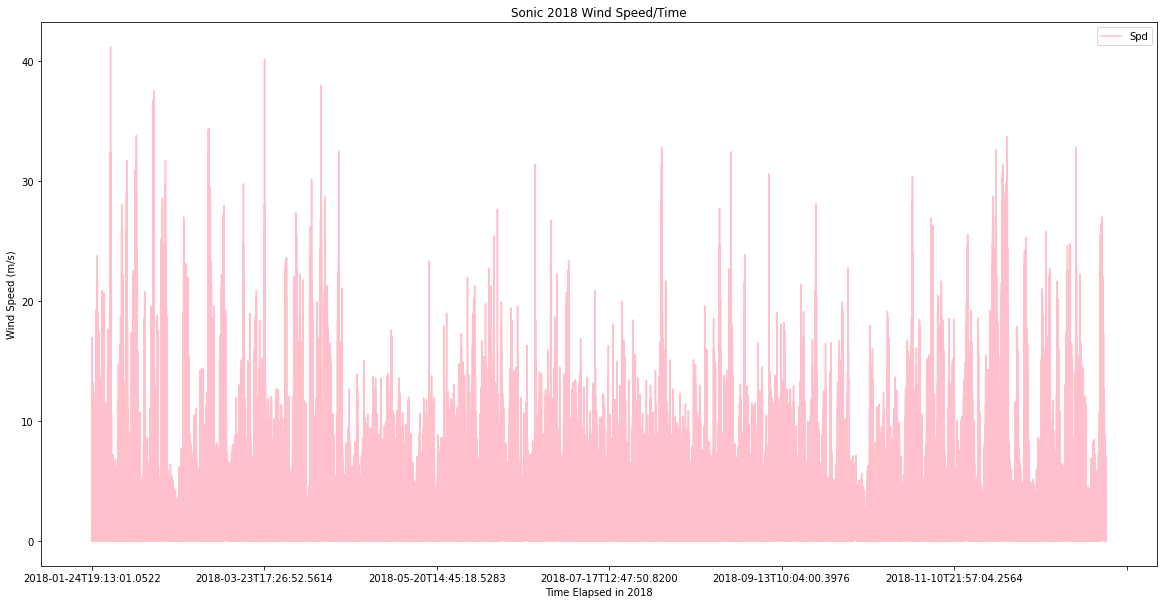

In [38]:
ax = dfSonic2018.plot(kind = 'line', x = 'datetime', y = 'Spd', color='pink', figsize = (20, 10))
ax.set_xlabel("Time Elapsed in 2018")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("Sonic 2018 Wind Speed/Time")

**Averaging Sonic Data from 2018**

In [17]:
#s = pd.Series(dfSonic2018.index // 10)
#dfSonic2018 = dfSonic2018[s.groupby(s).transform('count') == 10]
#new_df = dfSonic2018.groupby(dfSonic2018.index // 10).agg({'datetime':'last', 'Spd':'mean'})
#print(new_df.head(10))

#I divided total Sonic Points by total WxT points to get a number value by which I should average timestamps.
s = pd.Series(dfSonic2018.index // 289)
dfSonic2018 = dfSonic2018[s.groupby(s).transform('count') == 289]
new_df = dfSonic2018.groupby(dfSonic2018.index // 289).agg({'datetime':'last', 'Spd':'mean'})
print(new_df.head(10))

                   datetime       Spd
0  2018-01-24T19:17:49.0708  3.043772
1  2018-01-24T19:22:38.0908  4.743149
2  2018-01-24T19:27:27.1113  6.476436
3  2018-01-24T19:32:16.1312  8.537197
4  2018-01-24T19:37:05.1512  7.596678
5  2018-01-24T19:41:54.1713  7.926471
6  2018-01-24T19:46:43.1913  4.998547
7  2018-01-24T19:51:32.2118  6.060173
8  2018-01-24T19:56:21.2321  5.195294
9  2018-01-24T20:01:10.2484  3.919550


In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101765 entries, 0 to 101764
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  101765 non-null  object 
 1   Spd       101765 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.3+ MB


**PLOTTING ALL WXT 2018 DATA**

No splitting - just plotting all of the 2018 data in one chart.

Text(0.5, 1.0, 'WXT 2018 Data')

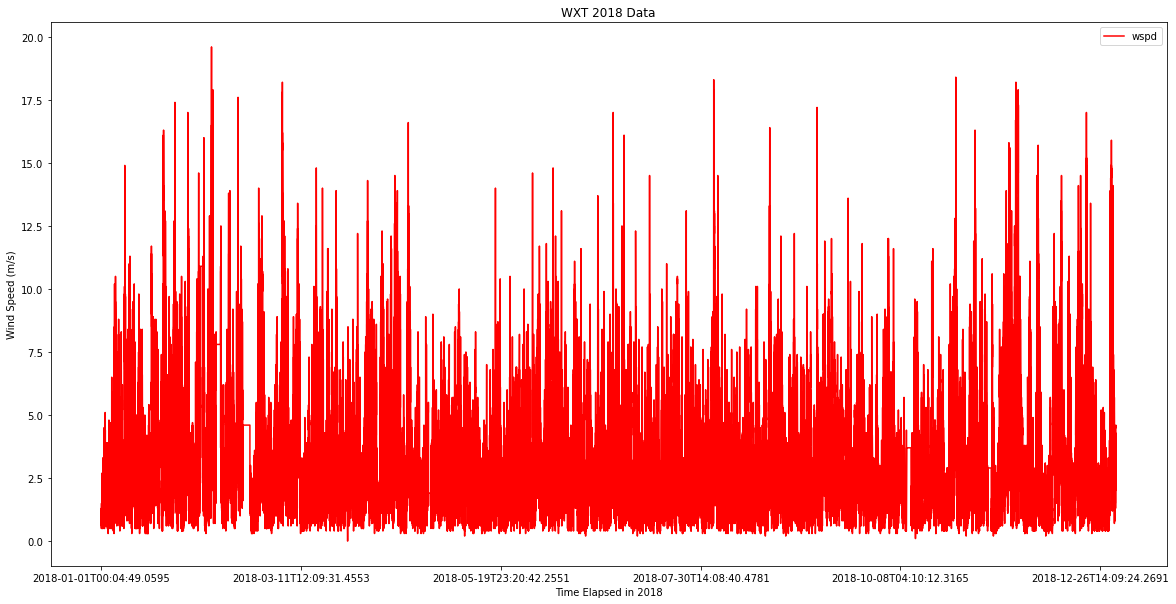

In [8]:
ax = dfWXT2018.plot(kind = 'line', x = 'datetime', y = 'wspd', color='r', figsize = (20, 10))
ax.set_xlabel("Time Elapsed in 2018")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("WXT 2018 Wind Speed/Time")

**PLOTTING SONIC 2018 AND WXT 2018 DATA TOGETHER OVERLAYED**

Now I wasn't able to find a perfect alignment of values, but we get 101,765 values with Sonic 2018 after averaging every 289 data points. And with WxT we get 101,559 values.

Text(0.5, 1.0, 'WXT 2018 vs. Sonic 2018 Wind Speed/Time')

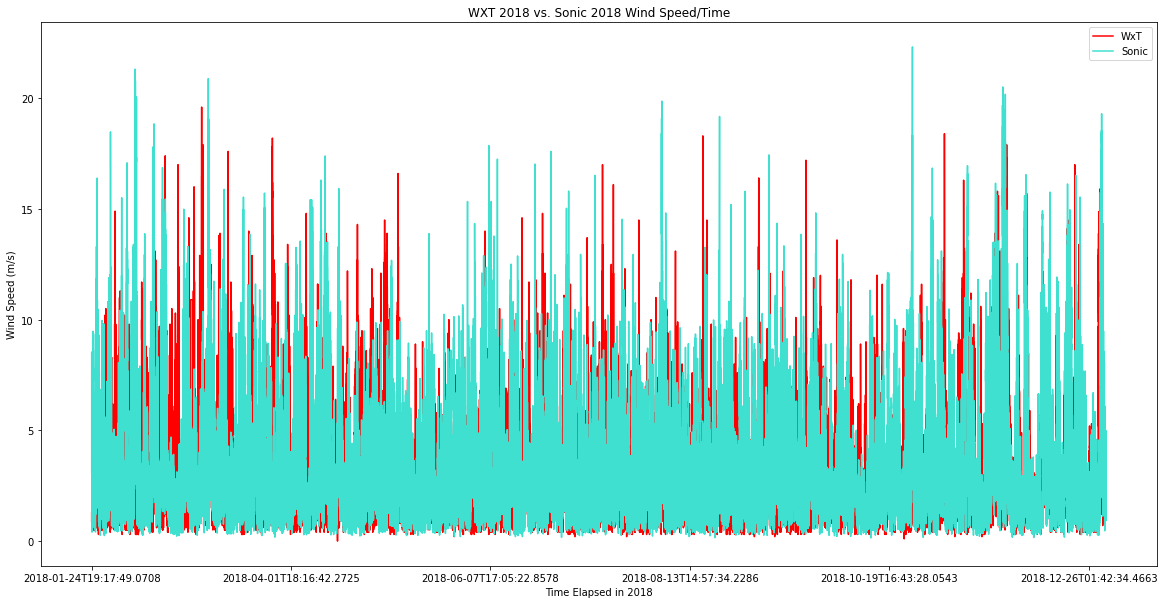

In [22]:
ax = dfWXT2018.plot(kind = 'line', x = 'datetime', y = 'wspd', color='r', figsize = (20, 10), label = "WxT")
new_df.plot(kind = 'line', x = 'datetime', y = 'Spd', color = 'turquoise', figsize = (20, 10), ax = ax, label = "Sonic")
ax.set_xlabel("Time Elapsed in 2018")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("WXT 2018 vs. Sonic 2018 Wind Speed/Time")

**READING IN THE 2019 SONIC DATA**

I used a Pandas Dataframe here and printed the information contained within the dataframe after reading it in.

In [25]:
dfSonic2019 = pd.read_csv('2019Sonic', encoding='utf-8')
dfSonic2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31431303 entries, 0 to 31431302
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   datetime  object 
 1   Dir       int64  
 2   Spd       float64
 3   Status    float64
 4   U         float64
 5   V         float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ GB


**PLOTTING ALL OF SONIC 2019 DATA**

I decided not to use a split here, and just plot all of the 2019 data in one chart. It takes about a minute or so to run.

Text(0, 0.5, 'Wind Speed (m/s)')

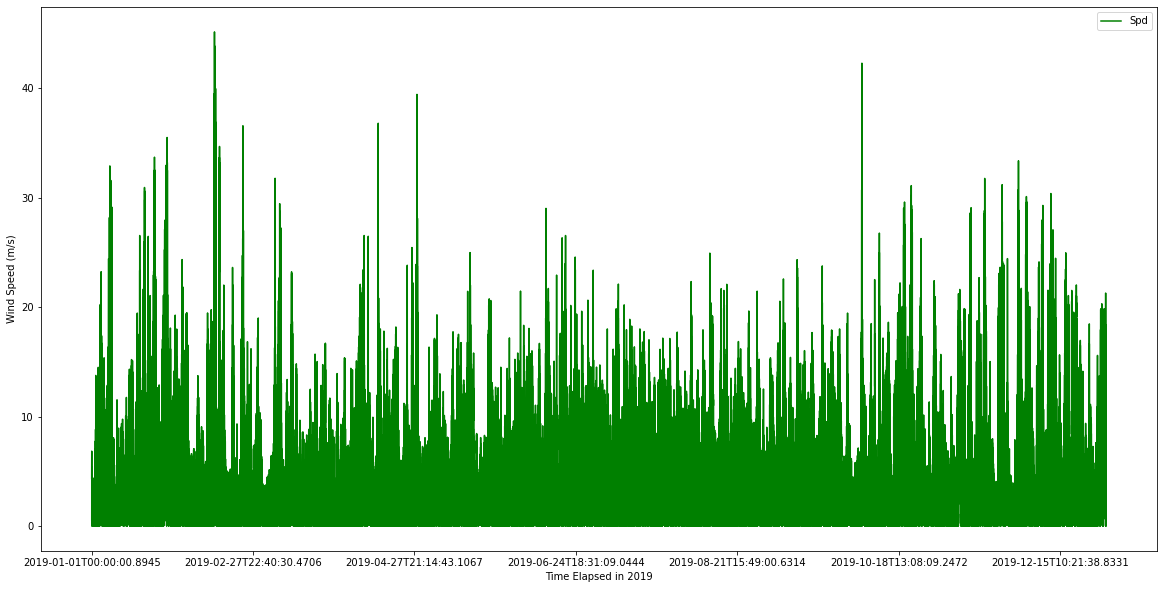

In [26]:
ax = dfSonic2019.plot(kind = 'line', x = 'datetime', y = 'Spd', color='green', figsize = (20, 10))
ax.set_xlabel("Time Elapsed in 2019")
ax.set_ylabel("Wind Speed (m/s)")

**Averaging Sonic Data from 2019**

In [27]:
#I divided total Sonic Points by total WxT points to get a number value by which I should average timestamps.
s = pd.Series(dfSonic2019.index // 300)
dfSonic2019 = dfSonic2019[s.groupby(s).transform('count') == 300]
new_df = dfSonic2019.groupby(dfSonic2019.index // 300).agg({'datetime':'last', 'Spd':'mean'})
print(new_df.head(10))

                   datetime       Spd
0  2019-01-01T00:04:59.9162  4.267967
1  2019-01-01T00:09:59.9322  4.298800
2  2019-01-01T00:14:59.9484  4.408500
3  2019-01-01T00:19:59.9681  2.793900
4  2019-01-01T00:24:59.9923  2.323967
5  2019-01-01T00:30:00.0081  2.817267
6  2019-01-01T00:35:00.0279  3.792133
7  2019-01-01T00:40:00.0482  4.853933
8  2019-01-01T00:45:00.0640  4.453933
9  2019-01-01T00:50:00.0838  4.034300


In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104771 entries, 0 to 104770
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  104771 non-null  object 
 1   Spd       104771 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.4+ MB


**READING IN THE 2019 WXT DATA**

I used a Pandas Dataframe here and printed the information contained within the dataframe after reading it in.

In [9]:
dfWXT2019 = pd.read_csv('WXT2019', encoding='utf-8')
dfWXT2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104776 entries, 0 to 104775
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   datetime    104776 non-null  object 
 1   wdir        104776 non-null  int64  
 2   wspd        104776 non-null  float64
 3   wspd_max    104776 non-null  float64
 4   tdry        104776 non-null  float64
 5   rh          104776 non-null  float64
 6   pres        104776 non-null  float64
 7   rain_accum  104776 non-null  float64
 8   batt        104776 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 7.2+ MB


**PLOTTING ALL WXT 2019 DATA**

No splitting - just plotting all of the 2019 data in one chart.

Text(0.5, 1.0, 'WXT 2019 Data')

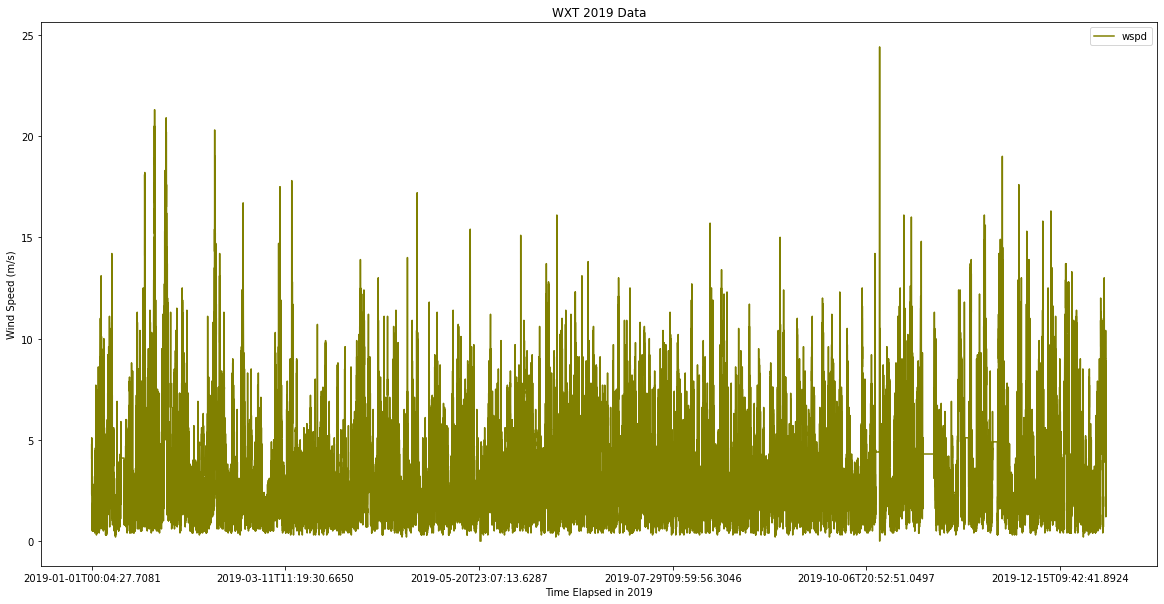

In [29]:
ax = dfWXT2019.plot(kind = 'line', x = 'datetime', y = 'wspd', color='olive', figsize = (20, 10))
ax.set_xlabel("Time Elapsed in 2019")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("WXT 2019 Data")

**PLOTTING SONIC 2019 AND WXT 2019 DATA TOGETHER OVERLAYED**

Now I wasn't able to find a perfect alignment of values, but we get 101,765 values with Sonic 2018 after averaging every 289 data points. And with WxT we get 101,559 values.

Text(0.5, 1.0, 'WXT 2019 vs. Sonic 2019 Wind Speed/Time')

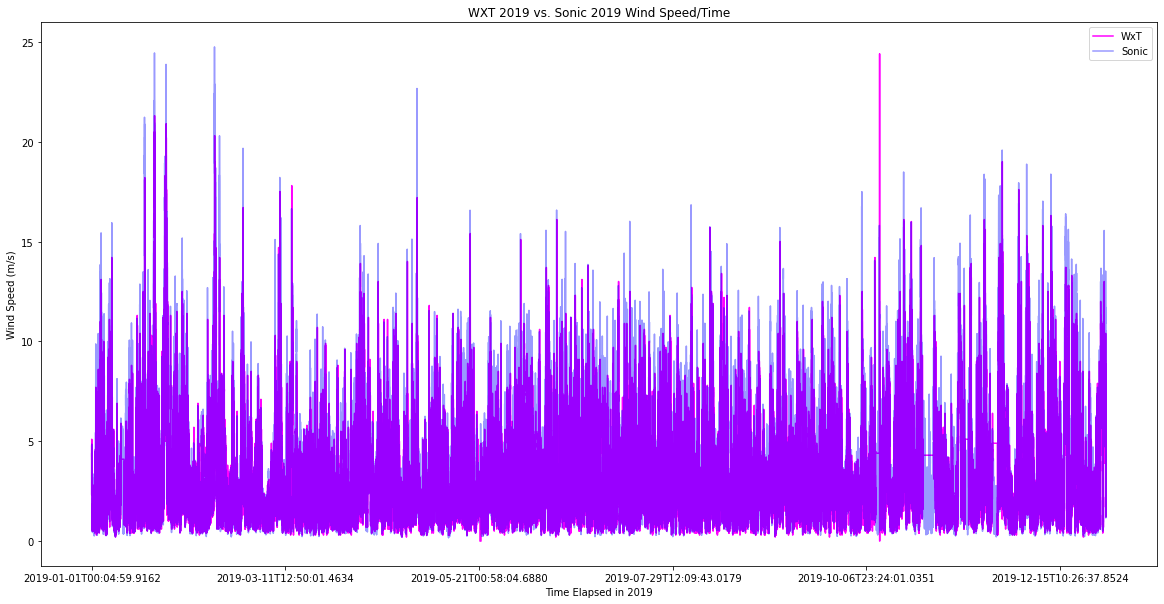

In [37]:
ax = dfWXT2019.plot(kind = 'line', x = 'datetime', y = 'wspd', color='magenta', figsize = (20, 10), label = "WxT")
new_df.plot(kind = 'line', x = 'datetime', y = 'Spd', color = 'blue', alpha = 0.4, figsize = (20, 10), ax = ax, label = "Sonic")
ax.set_xlabel("Time Elapsed in 2019")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("WXT 2019 vs. Sonic 2019 Wind Speed/Time")

**PLOTTING SONIC 2018 DATA WITH 2019 DATA**

The red line chart is $\textbf{2018}$ data, and the blue is $\textbf{2019}$ data.

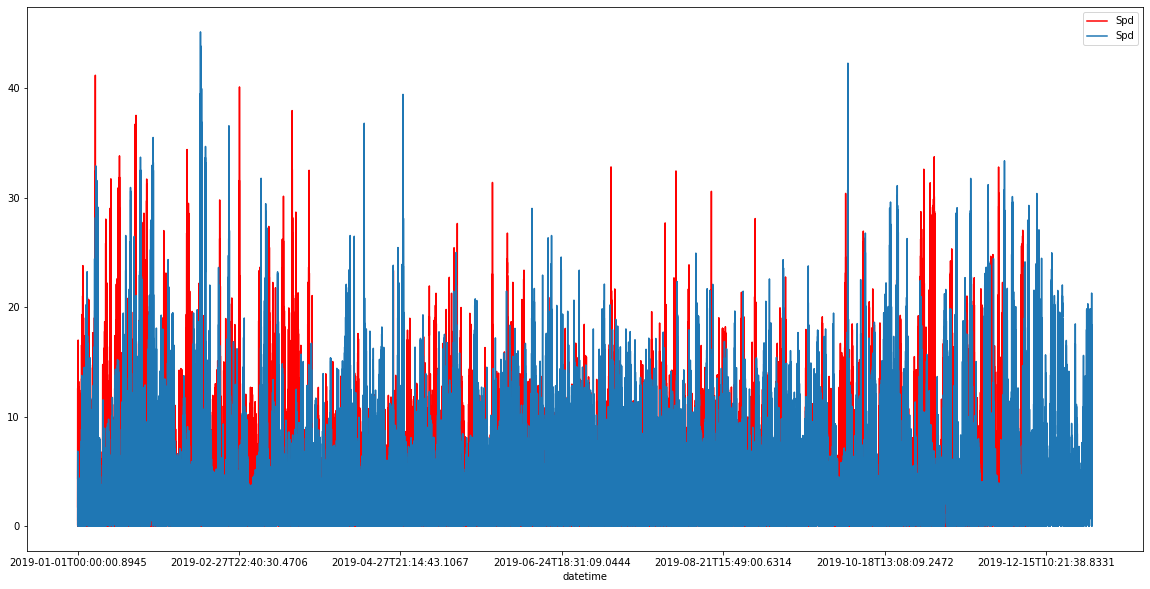

In [7]:
#2018 is red
ax = df.plot(kind = 'line', x = 'datetime', y = 'Spd', color='red', figsize = (20, 10))
#2019 is blue
df2.plot(kind = 'line', x = 'datetime', y = 'Spd', figsize = (20, 10), ax = ax)
ax.set_xlabel("Time Elapsed 2018 - 2019")
ax.set_ylabel("Wind Speed (m/s)")